In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# Create the inspector and connect it to the engine
inspector = inspect(engine)

print("Station table columns:")
# Use the inspector to print the column names within the 'measurement' and 'station' tables and their types
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column)

print("")
print("Measurement table columns:")
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column)

Station table columns:
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

Measurement table columns:
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), '

In [10]:
#session.query(Measurement)
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

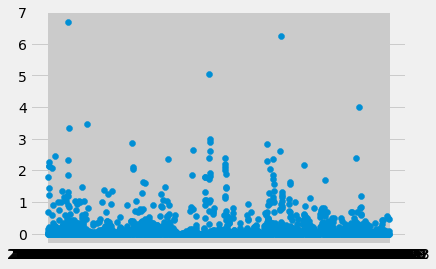

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
latest_date_ref = datetime(2017, 8, 23)
latest_date_minus_year = latest_date_ref - timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
latest = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()

# Sort the dataframe by date
latest_df = pd.DataFrame(latest)
latest_df['prcp'] = latest_df['prcp'].fillna(0)

# Use Pandas Plotting with atplotlib to plot the data
plt.scatter(latest_df['date'], latest_df['prcp'])
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
latest_df.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).group_by(Station.station).count()
print(stations)

9


In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
stations_df = pd.DataFrame(stations)

measurements = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
measurements_df = pd.DataFrame(measurements)

measurements_stations_df = stations_df.merge(measurements_df, left_on='id', right_on='id')

# measurements_stations_groupby_df = measurements_stations_df.groupby(['station']).count()
# #measurements_stations_groupby_df.sort_values('station', ascending=False)
# measurements_stations_groupby_df
# Sort the dataframe by date
measurements_stations_df
# BONUS: Query and print the number of unique Locations
# Hints: Look into counting and grouping operations in SQLAlchemy


,id,station_x,name,latitude,longitude,elevation,station_y,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,USC00519397,2010-01-01,0.08,65.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,USC00519397,2010-01-02,0.00,63.0
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,USC00519397,2010-01-03,0.00,74.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,USC00519397,2010-01-04,0.00,76.0
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,USC00519397,2010-01-08,0.00,64.0
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,USC00519397,2010-01-09,0.00,68.0
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,USC00519397,2010-01-10,0.00,73.0


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [17]:
# Close Session
session.close()